# Linear Regression

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 1.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Linear Regression with a single variable
---
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

In [13]:
# start by loading the data
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

# initialize some useful variables
m = len(data) # the number of training examples
X = np.append(np.ones((m, 1)), np.array(data["Population"]).reshape((m,1)), axis=1) # Add x0, a vector of 1's, to X.
y = np.array(data["Profit"]).reshape(m, 1)

data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Visualising the data
Plotting helps us get insight in the data we are working with. Using the `'bx'` option, we get blue crosses. You can read more about markers [here](https://matplotlib.org/api/markers_api.html).

Text(0.5, 1.0, 'Relation between profit and population')

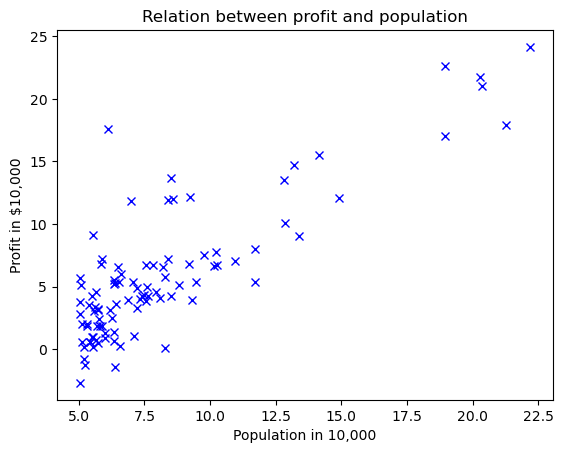

In [14]:
plt.plot(data['Population'], data['Profit'], 'bx')
plt.xlabel('Population in 10,000')
plt.ylabel('Profit in $10,000')
plt.title('Relation between profit and population')

### The hypotheses function
Our hypothesis function has the general form:
$y= h_\theta(x)= \theta_0 + \theta_1x$
Note that this is like the equation of a straight line. We give to $h_\theta(x)$ values for $\theta_0$ and $\theta_1$ to get our estimated output y. In other words, we are trying to create a function called $h_\theta$ that is trying to map our input data (the x's) to our output data (the y's).

### Cost function

The cost functions yields "how far off" our hypotheses $h_\theta$ is. It takes the avarage of the distance between our hypothesis and the actual point and squares it. Formally, the cost function has the following definition:

$J(\theta) = \frac{1}{2m} \displaystyle\sum_{i = 0}^{m}(h_θ(x^{(i)}) - y^{(i)})^2$

#### Vectorization
Vectorizations is the act of replacing the loops in a computer program with matrix operations. If you have a good linear algebra library (like numpy), the library will optimize the code automatically for the computer the code runs on. Mathematically, the 'regular' function should mean the same as the vectorized function.

Gradient descent vectorized:
$\theta = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta-\vec{y})$

**Exercise**: Implement a vectorized implementation of the cost function.

In [15]:
def cost_function(X, y, theta):
    """ Computes the cost of using theta as the parameter for linear gression to fit the data in X and y. """
    inner = np.matmul(X,theta)-y
    sq = np.matmul(np.transpose(inner),inner)
    m = len(y)
    dev2m = sq/(2*m)
    return dev2m[0][0]
    return 0

With $\theta = \begin{bmatrix}0 & 0\end{bmatrix}$, $J(\theta)$ should return 32.07.

In [16]:
initial_theta = np.zeros((2,1))
print(cost_function(X, y, initial_theta))

32.07273387745567


### Gradient descent
We want are hypothesis $h_\theta(x)$ to function as good as possibly. Therefore, we want to minimalize the cost function $J(\theta)$. Gradient descent is an algorithm used to do that. 

The formal definition of gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

An illustration of gradient descent on a single variable:
<div>
    <img style='max-width:50%;' src='notes/gradientdescent.png'>
</div>

**Exercise**: Implement the gradient descent algorithm in Python.

In [17]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []
    for i in range(iterations):
        oldTheta = theta
        xTheta = np.matmul(X,oldTheta)
        yMinusXTheta = np.subtract(y,xTheta)
        multByX = np.matmul(np.transpose(X),yMinusXTheta)
        multByAlpha = np.multiply(alpha/m,multByX)
        theta = np.add(oldTheta,multByAlpha)
        cost = cost_function(X,y,theta)
        J_history.append(cost)
    return theta, J_history

Gradient descent should have found approximately the following: $\theta = \begin{bmatrix}-3.6303\\1.1664\end{bmatrix}$

In [18]:
# You can change different values for these variables
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

### Using the results
#### Plotting the regularization line

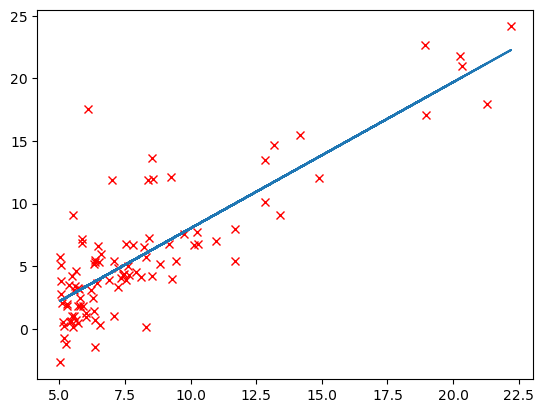

In [19]:
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], X.dot(theta), label='Linear regression')

#### Plotting the cost history
A plot of how $J(\theta)$ decreases over time. This is are model learning.

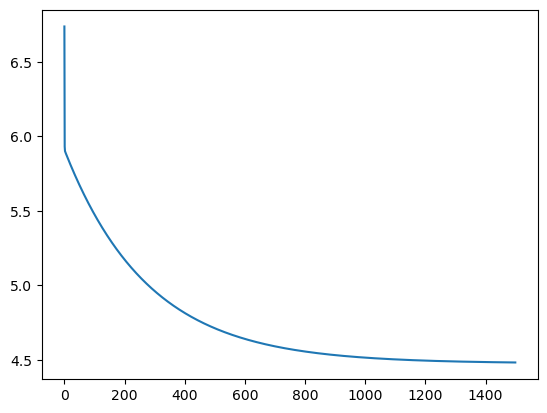

In [20]:
plt.plot(J_history)

#### Making a prediction using the model
The model can be used by calculating the dot product of the input and $\theta$.

In [21]:
prediction = np.array([1, 3.5]).dot(theta) * 10000 # don't forget to multiply the prediction by 10000
'In a city with a population of 35000, we predict a profit of $%.2f' % prediction

'In a city with a population of 35000, we predict a profit of $4519.77'


## Multivariate Linear Regression

---
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [11]:
# load data
data = pd.read_csv("ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# Initialize X, y and theta
x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))
X = np.array([x0, size, bedrooms]).T
y = np.array(data["Price"]).reshape(len(data.index), 1)
theta_init = np.zeros((3,1))

data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalization
When features differ by order of magnitude, first performing feature scaling can make gradient descent converge much more quickly. Formally:

$x := \frac{x - \mu}{\sigma}$

Where $\mu$ is the average and $\sigma$ the standard deviation.

**Important**: It is crucial to store $\mu$ and $\sigma$ if you want to make predictions using the model later.

**Exercise**: Perform feature normalization on the following dataset.

In [12]:
# perform normalization
def normalize(X):
    """ Normalizes the features in X
    
    returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    mu = np.zeros(len(X))
    sigma = np.zeros(len(X))
        
    return X, mu, sigma

X, mu, sigma = normalize(X)
X[0:5]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00]])

## Gradient Descent

Remember the algorithm for gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

The vectorization for multivariate gradient descent:

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \vec{y})$

**Exercise**: Implement gradient descent for multiple features. Make sure your solution is vectorized and supports any number of features.

In [13]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    J_history = []
    return theta, J_history

alpha = 0.01
iterations = 1500
initial_theta = np.zeros((3,1))
theta, J_history = gradient_descent_multi(X, y, initial_theta, alpha, iterations)
theta

array([[0.],
       [0.],
       [0.]])

As before we see how the cost decreases over time.

Text(0, 0.5, 'cost')

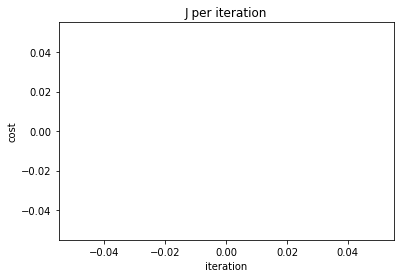

In [14]:
plt.plot(J_history)
plt.title('J per iteration')
plt.xlabel('iteration')
plt.ylabel('cost')

If we want to make a prediction on a normalized dataset, we have to normalize our input too.

In [15]:
price = theta.transpose() @ np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]]) # normalize the input
'In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


'In a house of 1650 square feet with 3 rooms, we predict a price of $nan'

### Using normal equations
We can use normal equations to get the exact solution in only one calculation. Although using normal equations is very fast for a small datasets with a small number of features, it can be inefficient for larger datasets because the complexity of matrix multiplication is $O(n^3)$.

The normal equation for linear regression is:

$\theta = 􏰅 (X^TX)^{−1}X^T\vec{y}$

**Exercise**: Find theta using normal equations.

In [16]:
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [17]:
price = theta.transpose() @ np.array([1, (1650-mu[1])/sigma[1], (3-mu[2])/sigma[2]]) # normalize the input
'In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


'In a house of 1650 square feet with 3 rooms, we predict a price of $nan'